In [2]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

## 텍스트 분류

In [3]:
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [4]:
import pandas as pd
outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


## 개체명 인식
- 특정 제품과 서비스 중 무엇에 대한 것인지 파악할때 사용. NLP에서는 제품, 장소, 사람 같은 실제 객체를 개체명이라 하고 이런 개체명을 텍스트에서 추출하는 작업을 개체명 인식

In [5]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


## 질문 답변
  - 텍스트 문장과 함께 답을 얻고 싶은 질문을 모델에 던지고, 모델은 답변 텍스트를 아웃풋으로 전달

In [6]:
reader = pipeline("question-answering")
question = "what does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


,score,start,end,answer
0,0.642406,335,358,an exchange of Megatron


## 텍스트 요약
  - 입력받은 긴 문장을 간단하게 요약

In [7]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


## 번역

In [8]:
translator = pipeline("translation_en_to_de",model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


# 텍스트 생성
  - 고객의 피드백에 빠르게 응답하기 위해 또는 여러가지 요인으로 텍스트 생성이 필요하다

In [9]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text+"\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. We do not stock any in our stores, and we do not believe in shipping for items shipped for free in other countries.

I must clarify that in addition to shipping, you paid more, for delivery within the 3-hour clock window of 8:45 AM Friday the 13th. However, as stated earlier by a customer


In [10]:
from huggingface_hub import list_datasets

all_datasets = [ds.id for ds in list_datasets()]
print("데이터셋 갯수:",len(all_datasets))
print("5개 데이터셋:",all_datasets[:5])

데이터셋 갯수: 266274
5개 데이터셋: ['HuggingFaceTB/finemath', 'fka/awesome-chatgpt-prompts', 'O1-OPEN/OpenO1-SFT', 'HuggingFaceFW/fineweb-2', 'amphora/QwQ-LongCoT-130K']


In [13]:
from datasets import load_dataset
emotions = load_dataset("emotion")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [14]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [16]:
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [17]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


## 메서드 레이블링
  - 레이블이 정수로 출력되므로 features 속성으로 label열을 선택한 후 int2str()메서드로 레이블 이름에 해당하는 새로운 열을 데이터프레임에 추가

In [18]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## 클래스 분포 확인

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

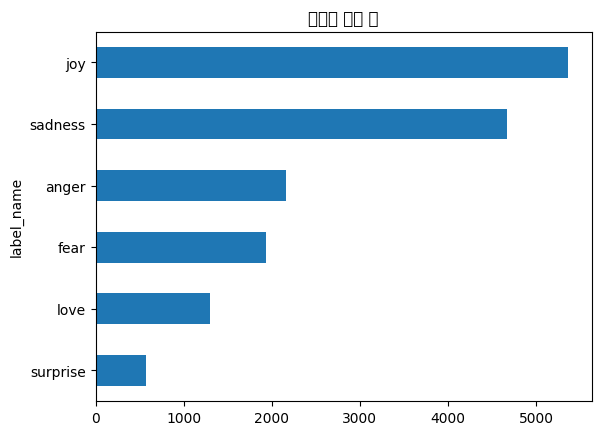

In [19]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("데이터 라벨 수")
plt.show()

## 트윗 길이 확인
  

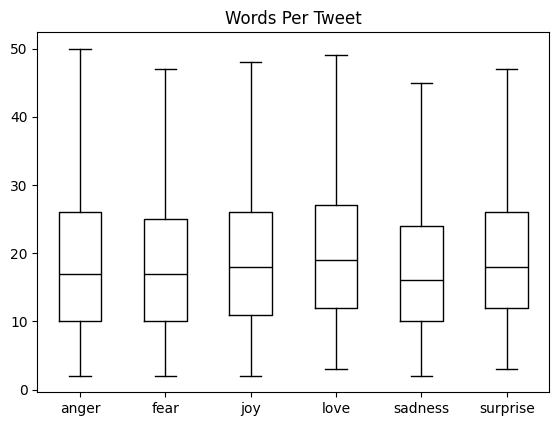

In [20]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

## 문자 토큰화


In [21]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [22]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [23]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [24]:
categorical_df = pd.DataFrame(
    {'Name':["Bumblebee","Optimus Prime","Megatron"], "Label ID":[0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [25]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [26]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

## 단어 토큰화
  - 텍스트를 문자가 아니라 단어로 분할하고 각 단어를 정수로 매핑

In [27]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## 부분단어 토큰화
  - 드물게 등장하는 단어를 더 작은 단위로 나누면 모델이 복잡한 단어나 철자 오류를 처리하기 용이

In [28]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [29]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [30]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [31]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
################토큰의 특징######################
## 1. [CLS]와 [SEP]의 역할은 시퀀스의 시작과 끝을 알림.
## 2. 토큰이 모두 소문자로 변환

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [32]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [33]:
tokenizer.vocab_size

30522

In [34]:
tokenizer.model_max_length

512

In [35]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [36]:
# text 값이 None이 아니고 문자열인지 확인
emotions = emotions.filter(lambda example: isinstance(example["text"], str) and len(example["text"].strip()) > 0)

Filter:   0%|          | 0/16000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

## 전체 데이터셋 토큰화하기
  - 1. padding=True로 지정하면 배치에 있는 가장 긴 샘플 크기에 맞춰 샘플을 0으로 패딩
  - 2. truncation=True로 설정하면 모델의 최대 문맥 크기에 맞춰 샘플을 자름
  - 3. 배치마다 입력 시퀀스는 배치에서 가장 긴 시퀀스 길이에 맞춰 패딩된다.
  - 4. 어텐션 마스크는 모델이 입력 텐서에서 패딩영역을 무시하는데 사용

In [38]:
from datasets import load_dataset
from transformers import AutoTokenizer

# 데이터셋 로드
emotions = load_dataset("emotion")

# 토크나이저 로드
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# text 값 필터링 (None, 빈 문자열 제거)
emotions = emotions.filter(lambda example: isinstance(example["text"], str) and len(example["text"].strip()) > 0)

# text 데이터를 문자열로 변환
def preprocess(batch):
    batch["text"] = [str(text).strip() for text in batch["text"]]
    return batch

emotions = emotions.map(preprocess, batched=True)

# 토크나이즈 함수
def tokenize(batch):
    print(batch["text"])  # 디버깅: batch 데이터 확인
    return tokenizer(batch["text"], padding=True, truncation=True)

# 토크나이즈 적용
emotions_encoded = emotions.map(tokenize, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['im feeling quite sad and sorry for myself but ill snap out of it soon', 'i feel like i am still looking at a blank canvas blank pieces of paper', 'i feel like a faithful servant', 'i am just feeling cranky and blue', 'i can have for a treat or if i am feeling festive', 'i start to feel more appreciative of what god has done for me', 'i am feeling more confident that we will be able to take care of this baby', 'i feel incredibly lucky just to be able to talk to her', 'i feel less keen about the army every day', 'i feel dirty and ashamed for saying that', 'i feel bitchy but not defeated yet', 'i was dribbling on mums coffee table looking out of the window and feeling very happy', 'i woke up often got up around am feeling pukey radiation and groggy', 'i was feeling sentimental', 'i walked out of there an hour and fifteen minutes later feeling like i had been beaten with a stick and then placed on the rack and stretched', 'i never stop feeling thankful as to compare with others i conside

## 텍스트 분류 모델 훈련
  - 1. 텍스트를 토큰화해 토큰 인코딩이라 부르는 원-핫 벡터로 나타냄
  - 2. 토크나이저 어휘사전의 크기가 토큰 인코딩의 차원을 결정(대개 2만~2백만 개 정도의 토큰으로 구성)
  - 3. 토큰 인코딩을 저차원 공간의 벡터인 토큰 임베딩으로 변환. 토큰 임베딩을 인코더 블록 층에 통과시켜 각 입력 토큰에 대한 은닉 상태를 만듬
  - 4. 은닉상태는 언어 모델링의 사전 훈련 목표를 달성하기 위해 마스킹된 입력 토큰을 예측하는 층으로 전달

## 트랜스포머를 특성 추출기로 사용
  - 학습하는 동안에 가중치를 동결하고 은닉상태를 분류 모델의 특성으로 사용

In [39]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [40]:
## 마지막 은닉상태
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [41]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [42]:
outputs.last_hidden_state.size()
# 6개의 입력 토큰마다 768차원의 벡터가 반환

torch.Size([1, 6, 768])

In [43]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [44]:
def extract_hidden_states(batch):
  # 모델 입력을 GPU로 옮깁니다.
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  # 마지막 은닉 상태를 추출합니다.
  with torch.no_grad():
      last_hidden_state = model(**inputs).last_hidden_state
  # [CLS] 토큰에 대한 벡터를 반환합니다.
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [45]:
emotions_encoded.set_format("torch", columns=["input_ids","attention_mask","label"])

In [46]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [47]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## 특성행렬 만들기
 - 이때까지 데이터 전처리한 데이터셋에 분류 모델을 훈련하기 위한 정보가 모두 담김

In [48]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [49]:
X_train

array([[-0.11675142,  0.09857123, -0.12962963, ...,  0.0587109 ,
         0.35432705,  0.40420732],
       [-0.03236254, -0.03231496, -0.19572626, ..., -0.1746575 ,
         0.35463768,  0.30276567],
       [ 0.03974637,  0.2022336 ,  0.14227107, ..., -0.11406809,
         0.33937767,  0.39583123],
       ...,
       [-0.00339798, -0.09585517,  0.05843512, ..., -0.04272687,
         0.24959208,  0.30761635],
       [ 0.06660283,  0.17334355,  0.12896696, ...,  0.06118621,
         0.29038212,  0.46844175],
       [ 0.01668812,  0.10127103, -0.00731717, ..., -0.0649366 ,
         0.3454055 ,  0.21993557]], dtype=float32)

## 훈련 세트 시각화하기
  - 768차원의 은닉 상태를 UMAP 알고리즘을 사용해서 이 벡터를 2D로 투영

In [50]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# 특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
# 유맵 객체 생성후 훈련
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# 2D 임베딩의 데이터프레임을 만듬
df_emb = pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.134742,6.567567,0
1,-3.322020,5.743795,0
2,5.248265,3.145180,3
3,-2.512738,3.730151,2
4,-3.578511,3.915386,3


In [1]:
!pip uninstall -y umap
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


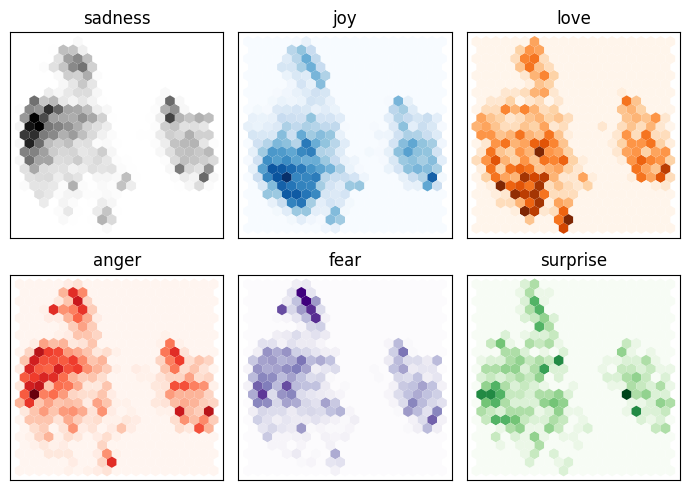

In [51]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels = emotions['train'].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

## 분류 모델 훈련(로지스틱)

In [52]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [53]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

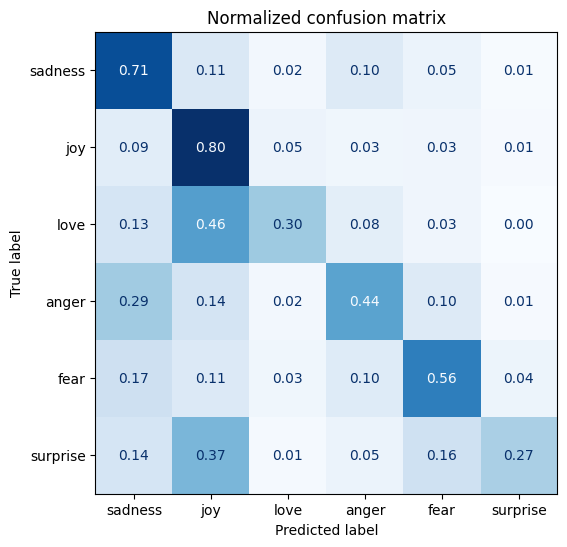

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## 트랜스포머 미세 튜닝
  - 미세 튜닝 방식에서는 은닉 상태를 고정된 특성으로 사용하지 않고 전체 모델을 훈련한다. 이를 위해 미분이 가능해야 한다.

In [55]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 성공 지표 정의
  - 훈련하는 동안에 성능을 모니터링하기 위해 Trainer에 사용할 compute_metrics() 함수를 정의.


In [56]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1": f1}

## 모델 훈련

In [57]:
from huggingface_hub import notebook_login

notebook_login()

In [58]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [59]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset = emotions_encoded['validation'],
                  tokenizer=tokenizer)
trainer.train()

<ipython-input-59-55e446e156bf>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.834900,0.306524,0.903500,0.902409


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.834900,0.306524,0.903500,0.902409
2,0.249000,0.216349,0.923000,0.923127


TrainOutput(global_step=500, training_loss=0.5419645843505859, metrics={'train_runtime': 15544.1141, 'train_samples_per_second': 2.059, 'train_steps_per_second': 0.032, 'total_flos': 718554424246272.0, 'train_loss': 0.5419645843505859, 'epoch': 2.0})

In [61]:
preds_output = trainer.predict(emotions_encoded['validation'])

In [62]:
preds_output.metrics

{'test_loss': 0.21634864807128906,
 'test_accuracy': 0.923,
 'test_f1': 0.9231272394628444,
 'test_runtime': 225.9565,
 'test_samples_per_second': 8.851,
 'test_steps_per_second': 0.142}

In [63]:
y_preds = np.argmax(preds_output.predictions, axis=1)

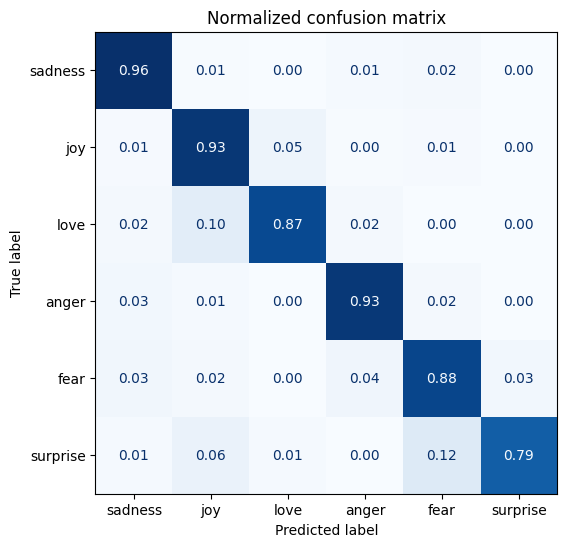

In [64]:
plot_confusion_matrix(y_preds, y_valid, labels)

## 오류 분석
  - 모델의 손실 기준으로 검증 샘플을 정렬하는 방법

In [65]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  # 모든 입력 텐서를 모델과 같은 장치로 이동시킴
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch['label'].to(device),reduction="none")

  # 다른 데이터셋 열과 호환되도록 출력을 cpu로 옮긴다.
  return {"loss":loss.cpu().numpy(),
          "predicted_label":pred_label.cpu().numpy()}

In [ ]:
emotions_encoded.set_format("pandas")
cols= ["text","label","predicted_label","loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)